# Bayesian Network

### Prereq

In [58]:
%matplotlib inline
import matplotlib as matplt
import seaborn as sb
import numpy as np 
from pomegranate import *

sb.set_style("whitegrid")
np.random.seed(0)
np.set_printoptions(suppress=True)
%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.23.5
scipy      : 1.10.1
pomegranate: 0.14.4

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.0-69-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



### Network

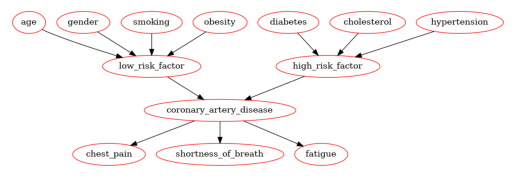

In [79]:
# Nodes
age = DiscreteDistribution({"young": 0.5, "old": 0.5})
gender = DiscreteDistribution({"male": 0.5, "female": 0.5})
smoking = DiscreteDistribution({"smoker": 0.28, "non-smoker": 0.72})
obesity = DiscreteDistribution({"obese": 0.11, "non-obese": 0.89})

low_risk_factor = ConditionalProbabilityTable(
    [
        ["young", "male", "smoker", "obese", "high", 0.8],
        ["young", "male", "smoker", "obese", "low", 0.2],
        
        ["young", "male", "smoker", "non-obese", "high", 0.7],
        ["young", "male", "smoker", "non-obese", "low", 0.3],
        
        ["young", "male", "non-smoker", "obese", "high", 0.6],
        ["young", "male", "non-smoker", "obese", "low", 0.4],
        
        ["young", "male", "non-smoker", "non-obese", "high", 0.2],
        ["young", "male", "non-smoker", "non-obese", "low", 0.8],
        
        ["young", "female", "smoker", "obese", "high", 0.7],
        ["young", "female", "smoker", "obese", "low", 0.3],
        
        ["young", "female", "smoker", "non-obese", "high", 0.6],
        ["young", "female", "smoker", "non-obese", "low", 0.4],
        
        ["young", "female", "non-smoker", "obese", "high", 0.5],
        ["young", "female", "non-smoker", "obese", "low", 0.5],
        
        ["young", "female", "non-smoker", "non-obese", "high", 0.1],
        ["young", "female", "non-smoker", "non-obese", "low", 0.9],
        
        ["old", "male", "smoker", "obese", "high", 0.9],
        ["old", "male", "smoker", "obese", "low", 0.1],
        
        ["old", "male", "smoker", "non-obese", "high", 0.8],
        ["old", "male", "smoker", "non-obese", "low", 0.2],
        
        ["old", "male", "non-smoker", "obese", "high", 0.7],
        ["old", "male", "non-smoker", "obese", "low", 0.3],
        
        ["old", "male", "non-smoker", "non-obese", "high", 0.4],
        ["old", "male", "non-smoker", "non-obese", "low", 0.6],
        
        ["old", "female", "smoker", "obese", "high", 0.8],
        ["old", "female", "smoker", "obese", "low", 0.2],
        
        ["old", "female", "smoker", "non-obese", "high", 0.7],
        ["old", "female", "smoker", "non-obese", "low", 0.3],
        
        ["old", "female", "non-smoker", "obese", "high", 0.6],
        ["old", "female", "non-smoker", "obese", "low", 0.4],
        
        ["old", "female", "non-smoker", "non-obese", "high", 0.3],
        ["old", "female", "non-smoker", "non-obese", "low", 0.7],
    ],
    [age, gender, smoking, obesity],
)

hypertension = DiscreteDistribution({"low": 0.45, "high": 0.55})
cholesterol =  DiscreteDistribution({"low": 0.88, "high": 0.12})
diabetes = DiscreteDistribution({"present": 0.11, "absent": 0.89})

high_risk_factor = ConditionalProbabilityTable([
        ["low", "low", "absent", "high", 0.09],
        ["low", "low", "absent", "low", 0.91],
    
        ["low", "low", "present", "high", 0.59],
        ["low", "low", "present", "low", 0.41],
    
        ["low", "high", "absent", "high", 0.12],
        ["low", "high", "absent", "low", 0.88],
    
        ["low", "high", "present", "high", 0.93],
        ["low", "high", "present", "low", 0.07],
    
        ["high", "low", "absent", "high", 0.12],
        ["high", "low", "absent", "low", 0.88],
    
        ["high", "low", "present", "high", 0.64],
        ["high", "low", "present", "low", 0.36],
    
        ["high", "high", "absent", "high", 0.17],
        ["high", "high", "absent", "low", 0.63],
    
        ["high", "high", "present", "high", 0.1],
        ["high", "high", "present", "low", 0.9],
    ],
    [hypertension, cholesterol, diabetes], 
)

coronary_artery_disease = ConditionalProbabilityTable(
    [
        ["high", "low", "disease", 0.67],
        ["high", "low", "no_disease", 0.33],
        ["low", "low", "disease", 0.11],
        ["low", "low", "no_disease", 0.89],
        
        ["high", "high", "disease", 0.98],
        ["high", "high", "no_disease", 0.02],
        ["low", "high", "disease", 0.93],
        ["low", "high", "no_disease", 0.07],
    ],
    [low_risk_factor, high_risk_factor],
)

chest_pain = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.8], 
        ["disease", "absent", 0.2],
        ["no_disease", "present", 0.2], 
        ["no_disease", "absent", 0.8],
    ], 
    [coronary_artery_disease]
)
shortness_of_breath = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.7],
        ["disease", "absent", 0.3],
        ["no_disease", "present", 0.3],
        ["no_disease", "absent", 0.7],
    ],
    [coronary_artery_disease]
)
fatigue = ConditionalProbabilityTable(
    [
        ["disease", "present", 0.6],
        ["disease", "absent", 0.4],
        ["no_disease", "present", 0.4],
        ["no_disease", "absent", 0.6],
    ],
    [coronary_artery_disease]
)

# States
s1 = State(age, name="age")
s2 = State(gender, name="gender")
s3 = State(smoking, name="smoking")
s4 = State(obesity, name="obesity")
s5 = State(low_risk_factor, name="low_risk_factor")
s6 = State(coronary_artery_disease, name="coronary_artery_disease")
s7 = State(chest_pain, name="chest_pain")
s8 = State(shortness_of_breath, name="shortness_of_breath")
s9 = State(fatigue, name="fatigue")

s10 = State(diabetes, name="diabetes")
s11 = State(cholesterol, name="cholesterol")
s12 = State(hypertension, name="hypertension")
s13 = State(high_risk_factor, name="high_risk_factor")

# Create the Bayesian network
model = BayesianNetwork("Medical Disease Diagnosis")

# Add states
model.add_states(s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13)

# Add edges
model.add_edge(s1, s5)
model.add_edge(s2, s5)
model.add_edge(s3, s5)
model.add_edge(s4, s5)
model.add_edge(s5, s6)
model.add_edge(s6, s7)
model.add_edge(s6, s8)
model.add_edge(s6, s9)
model.add_edge(s10, s13)
model.add_edge(s11, s13)
model.add_edge(s12, s13)
model.add_edge(s13, s6)

# Finalize the model
model.bake()
model.plot()

In [80]:
low_risk_factor

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "young",
            "male",
            "smoker",
            "obese",
            "high",
            "0.8"
        ],
        [
            "young",
            "male",
            "smoker",
            "obese",
            "low",
            "0.2"
        ],
        [
            "young",
            "male",
            "smoker",
            "non-obese",
            "high",
            "0.7"
        ],
        [
            "young",
            "male",
            "smoker",
            "non-obese",
            "low",
            "0.3"
        ],
        [
            "young",
            "male",
            "non-smoker",
            "obese",
            "high",
            "0.6"
        ],
        [
            "young",
            "male",
            "non-smoker",
            "obese",
            "low",
            "0.4"
        ],
        [
            "young",
      

In [81]:
model.probability(np.array(["young", "male", "smoker", "obese", None, None, None, None, None, None, None, None, None], ndmin=2))

0.007700000000000003

In [82]:
model.probability(np.array([None, None, "smoker", "obese", None, None,"present", None, None, None, None, None, None], ndmin=2))

0.030800000000000015

In [84]:
model.predict_proba(np.array([None, None, "smoker", "obese", None, None,"present", None, None, None, None, None, None], ndmin=2))

[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "young" : 0.48763922316892677,
                    "old" : 0.5123607768310732
                }
            ],
            "frozen" : false
        }                                         ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "male" : 0.5123607768310732,
                    "female" : 0.4876392231689267
                }
            ],
            "frozen" : false
        }                                        , 'smoker', 'obese',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "high" : 0.879108971718868,
  

In [85]:
model.predict_proba({"age": "young", "gender": "male"})

array(['young', 'male', {
                            "class" : "Distribution",
                            "dtype" : "str",
                            "name" : "DiscreteDistribution",
                            "parameters" : [
                                {
                                    "smoker" : 0.2800000000000002,
                                    "non-smoker" : 0.7199999999999998
                                }
                            ],
                            "frozen" : false
                        }                                            ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "obese" : 0.11000000000000033,
                   "non-obese" : 0.8899999999999998
               }
           ],
           "frozen" : false
       }                                           ,
       {
           "class" : "Distribut

In [86]:
model.predict_proba({})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "young" : 0.5,
                   "old" : 0.4999999999999999
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "male" : 0.5,
                   "female" : 0.4999999999999999
               }
           ],
           "frozen" : false
       }                                        ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "smoker" : 0.2800000000000002,
                   "non-smoker" : 0.7199999999999998
               }
           ],
